<a href="https://colab.research.google.com/github/millysg/Fundamentos_Ciencia_de_Dados-Atividades/blob/main/Atividade_Regress%C3%A3o_Linear_Multipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

dados = pd.read_csv("/content/ansiedade.csv")
dados.head()

,idade,horas_de_sono,at_fisica_h_semana,cafeina_mg_dia,consumo_alcool_drinks_semana,nivel_stress,batimentos_minuto,taxa_respiracao,nivel_suor,sessoes_terapia_mes,qualidade_dieta,nivel_ansiedade
0,29,6.0,2.7,181,10,10,114,14,4,3,7,5
1,46,6.2,5.7,200,8,1,62,23,2,2,8,3
2,64,5.0,3.7,117,4,1,91,28,3,1,1,1
3,20,5.8,2.8,360,6,4,86,17,3,0,1,2
4,49,8.2,2.3,247,4,1,98,19,4,1,3,1


In [3]:
#Existem valores faltantes?

print(dados.isnull().sum())

idade                           0
horas_de_sono                   0
at_fisica_h_semana              0
cafeina_mg_dia                  0
consumo_alcool_drinks_semana    0
nivel_stress                    0
batimentos_minuto               0
taxa_respiracao                 0
nivel_suor                      0
sessoes_terapia_mes             0
qualidade_dieta                 0
nivel_ansiedade                 0
dtype: int64


In [7]:
# Seleção de atributos (quais valores de x vão entar no modelo?)

atributos_selecionados = ['idade', 'horas_de_sono', 'at_fisica_h_semana', 'cafeina_mg_dia', 'consumo_alcool_drinks_semana', 'nivel_stress', 'batimentos_minuto', 'taxa_respiracao', 'nivel_suor', 'sessoes_terapia_mes', 'qualidade_dieta', 'nivel_ansiedade']

x = dados[atributos_selecionados]
y = dados['nivel_ansiedade']
# Verificando a correlçao de x com y

matriz_correlacoes = x.corr()
print(matriz_correlacoes['nivel_ansiedade'])


idade                          -0.074316
horas_de_sono                  -0.493836
at_fisica_h_semana             -0.243187
cafeina_mg_dia                  0.350651
consumo_alcool_drinks_semana    0.100626
nivel_stress                    0.667939
batimentos_minuto               0.188900
taxa_respiracao                 0.157048
nivel_suor                      0.160074
sessoes_terapia_mes             0.517606
qualidade_dieta                -0.220245
nivel_ansiedade                 1.000000
Name: nivel_ansiedade, dtype: float64


Text(0.5, 1.0, 'Matriz de correções')

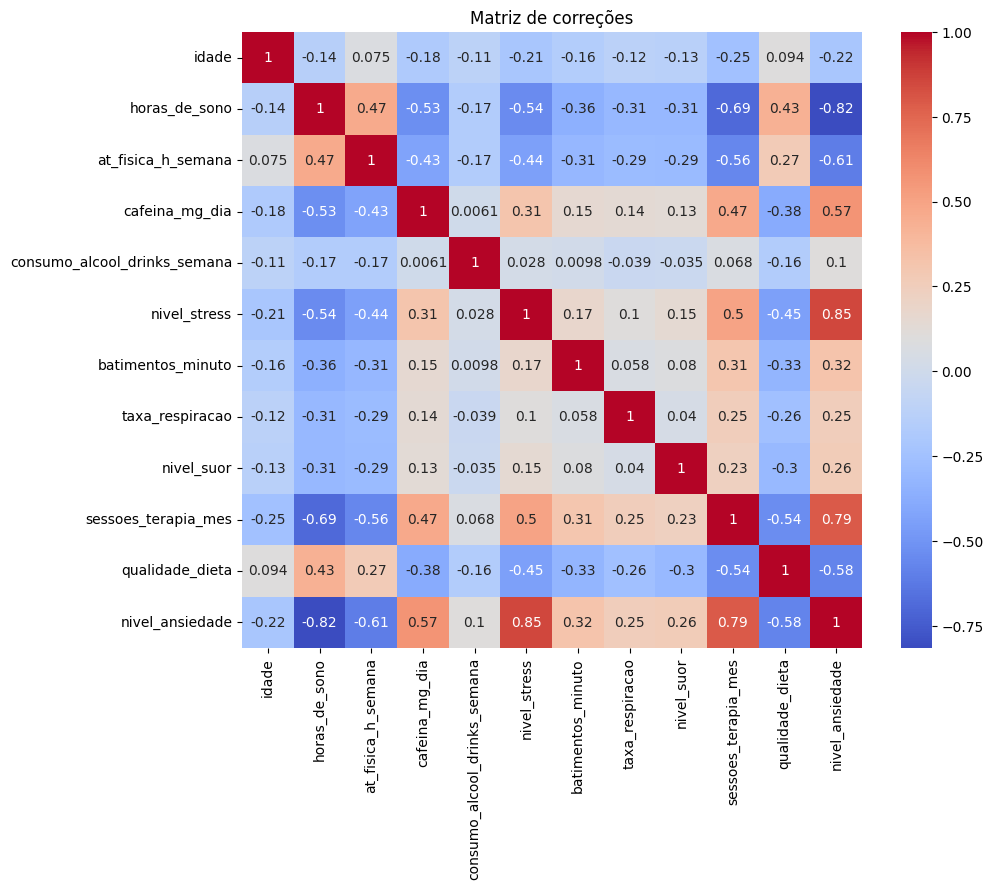

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
sns.heatmap(matriz_correlacoes.corr(), annot = True, cmap = 'coolwarm')
plt.title('Matriz de correções')

In [13]:
atributos_selecionados_1 = ['nivel_stress', 'sessoes_terapia_mes', 'horas_de_sono']

x = dados[atributos_selecionados_1]
y = dados['nivel_ansiedade']

print(x)

       nivel_stress  sessoes_terapia_mes  horas_de_sono
0                10                    3            6.0
1                 1                    2            6.2
2                 1                    1            5.0
3                 4                    0            5.8
4                 1                    1            8.2
...             ...                  ...            ...
10995             8                    1            6.1
10996             7                    2            6.6
10997             8                    2            6.7
10998             4                    1            5.7
10999             1                    2            6.1

[11000 rows x 3 columns]


In [14]:
# Padronização dos dados (para resolver problemas de escala)

from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()

x_padronizado = padronizador.fit_transform(x)

print(x_padronizado)

[[ 1.41562653  0.26210725 -0.53011464]
 [-1.65912175 -0.1959766  -0.36717564]
 [-1.65912175 -0.65406046 -1.34480966]
 ...
 [ 0.73234914 -0.1959766   0.04017187]
 [-0.63420565 -0.65406046 -0.77452315]
 [-1.65912175 -0.1959766  -0.44864514]]


In [15]:
# Regressão Linear múltipla

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# separaçãodos dados em treino e teste

x_treino, x_teste, y_treino, y_teste = train_test_split(x_padronizado, y, test_size = 0.2, random_state = 42)


# Inicialização e ajuste do modelo

modelo = LinearRegression()
modelo.fit(x_treino, y_treino)

# Predições na amostra de teste
y_pred = modelo.predict(x_teste)

print("Erro médio percentual absoluto (MAPE):", mean_absolute_percentage_error(y_teste, y_pred))
print("R²:", r2_score(y_teste, y_pred))

Erro médio percentual absoluto (MAPE): 0.33667211622437865
R²: 0.6827965546182231
